## Detección de desviación de datos

Echemos un vistazo al código para calcular algunas de las diferentes distancias estadísticas:

- Kolmogorov–Smirnov (KS)
- First Wassertein Distance (Earth Mover’s distance)
- Cramér-von Mises (CM) distance (Energy distance)
- Population Stability Index (PSI)

In [5]:
import pandas as pd

In [7]:
data = pd.read_csv("rt_2563789698568873_gradual.csv")

In [8]:
data.head()

,X1,X2,class
0,0.550284,0.918541,0.0
1,0.564631,0.409379,0.0
2,0.430762,0.624576,0.0
3,0.662184,0.154598,0.0
4,0.266372,0.541274,1.0


In [11]:
data['class'].value_counts()

0.0    21219
1.0    19781
Name: class, dtype: int64

In [10]:
data['class'].value_counts(normalize=True)

0.0    0.517537
1.0    0.482463
Name: class, dtype: float64

In [13]:
def split_dataframe(df, chunk_size = 10000): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

def get_ratio(df, target_var='class'):
    class_0_count = df[target_var].value_counts()[0]
    class_1_count = df[target_var].value_counts()[1]
    total_count = class_0_count+class_1_count
    pos_ratio = class_1_count/total_count
    return pos_ratio

In [14]:
chunk_list = split_dataframe(data, 3418)

In [15]:
chunk_list

[            X1        X2  class
 0     0.550284  0.918541    0.0
 1     0.564631  0.409379    0.0
 2     0.430762  0.624576    0.0
 3     0.662184  0.154598    0.0
 4     0.266372  0.541274    1.0
 ...        ...       ...    ...
 3413  0.955552  0.232441    1.0
 3414  0.547846  0.786103    0.0
 3415  0.714151  0.495885    0.0
 3416  0.675908  0.914735    0.0
 3417  0.320161  0.641322    1.0
 
 [3418 rows x 3 columns],
             X1        X2  class
 3418  0.484428  0.008003    0.0
 3419  0.488004  0.147074    1.0
 3420  0.746626  0.139806    0.0
 3421  0.674716  0.603585    0.0
 3422  0.006629  0.814296    1.0
 ...        ...       ...    ...
 6831  0.743380  0.385491    0.0
 6832  0.404724  0.374480    1.0
 6833  0.503803  0.987068    1.0
 6834  0.121492  0.335642    1.0
 6835  0.140095  0.443046    1.0
 
 [3418 rows x 3 columns],
              X1        X2  class
 6836   0.859121  0.571586    0.0
 6837   0.496703  0.814541    0.0
 6838   0.946897  0.624484    0.0
 6839   0.380476

In [16]:
month_ = 1
for df in chunk_list:
    df['month'] = month_
    month_+=1
    print(get_ratio(df))

0.4880046811000585
0.48244587478057344
0.4909303686366296
0.3317729666471621
0.32943241661790523
0.34991222937390287
0.6243417203042715
0.6146869514335869
0.609713282621416
0.489174956114687
0.4906377998829725
0.48853615520282184


C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_36436\1436674519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = month_
C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_36436\1436674519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = month_
C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_36436\1436674519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [17]:
data_monthly = pd.concat(chunk_list)

In [18]:
data_monthly

,X1,X2,class,month
0,0.550284,0.918541,0.0,1
1,0.564631,0.409379,0.0,1
2,0.430762,0.624576,0.0,1
3,0.662184,0.154598,0.0,1
4,0.266372,0.541274,1.0,1
...,...,...,...,...
40995,0.842049,0.729838,1.0,12
40996,0.492425,0.974886,1.0,12
40997,0.370881,0.079075,1.0,12
40998,0.714709,0.093885,0.0,12


### Analisis de Media

In [19]:
data_monthly_mean = data_monthly.groupby(by="month")[['X1','X2']].mean().T
data_monthly_mean.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
X1,0.507525,0.499226,0.494066,0.490010,0.503252,0.503267,0.499385,0.500954,0.499622,0.497465,0.490109,0.497236
X2,0.499871,0.496975,0.500308,0.500965,0.494713,0.499834,0.494208,0.506740,0.500584,0.492279,0.492288,0.512654


## Test de Kolmogorov-Smirnov (KS) de 1 y 2 muestras 

La prueba de Kolmogorov-Smirnov para una muestra es un procedimiento de "bondad de ajuste", que permite medir el grado de concordancia existente entre la distribución de un conjunto de datos y una distribución teórica específica.

Se utiliza para contrastar si un conjunto de datos se ajustan o no a una distribución normal.

Muchas pruebas paramétricas requieren que las variables se distribuyan de forma normal. La prueba de Kolmogorov-Smirnov para una muestra se puede utilizar para comprobar que una variable (por ejemplo ingresos) se distribuye normalmente.

Como estamos comparando las distribuciones, necesitamos establecer una distribución de referencia. Este podría ser el primer mes de nuestro conjunto de datos, o podríamos establecer la referencia como el conjunto de datos de entrenamiento completo y luego comparar cada mes del conjunto de prueba con el conjunto de entrenamiento.

In [20]:
top_feature_list = ['X1','X2']

In [21]:
# Create reference dataframe
month_list = list(data_monthly['month'].unique())
d = {month: pd.DataFrame() for month in month_list}
for month in month_list:
    d[month] = data_monthly[data_monthly['month']==month]

In [22]:
import numpy as np
from scipy.stats import wasserstein_distance, energy_distance,  ks_2samp

reference=d[1] #reference snapshot
n = reference.shape[0] #size of the reference distribution

In [25]:
reference.head()

,X1,X2,class,month
0,0.550284,0.918541,0.0,1
1,0.564631,0.409379,0.0,1
2,0.430762,0.624576,0.0,1
3,0.662184,0.154598,0.0,1
4,0.266372,0.541274,1.0,1


In [24]:
n

3418

#### Para 1 muestra
Como podemos ver, si tomamnos la referencia con valor X1 o X2, denotamos que el pvalue es menor a 0.05, por lo que rechazamos la hipótesis nula. Tenemos evidencia suficiente para decir que los datos de la muestra no provienen de una distribución normal.

In [31]:
from scipy import stats
stats.kstest(reference['X1'], 'norm')

KstestResult(statistic=0.500250471916869, pvalue=0.0)

In [32]:
from scipy import stats
stats.kstest(reference['X2'], 'norm')

KstestResult(statistic=0.5000746023561207, pvalue=0.0)

#### Para 2 muestras
El siguiente código muestra cómo realizar una prueba de Kolmogorov-Smirnov en estas dos muestras para determinar si provienen de la misma distribución:

In [37]:
from scipy import stats
stats.kstest(reference['X1'], d[2]['X1'], 'norm')

KstestResult(statistic=0.024283206553540083, pvalue=0.2659023774777394)

In [38]:
from scipy.stats import ks_2samp
ks_2samp(reference['X1'], d[2]['X1'])

KstestResult(statistic=0.024283206553540083, pvalue=0.2659023774777394)

A partir de la salida, podemos ver que el estadístico de prueba es 0.024 y el valor p correspondiente es 0.265 . Dado que el valor p es mayor que .05, aceptamos la hipótesis nula. Tenemos suficiente evidencia para decir que los dos conjuntos de datos provienen de la misma distribución.

### First Wassertein Distance

Esta distancia también se conoce como "earth mover’s distance", ya que puede verse como la cantidad mínima de "trabajo" requerido para transformar u en v, donde "trabajo" se mide como la cantidad de peso de distribución que debe moverse, multiplicado por la distancia tiene que ser movido.

La distancia de Wasserstein se usa a menudo para medir la diferencia entre dos imágenes. Y la distancia de Wasserstein también se usa a menudo en las redes adversas generativas (GAN) para calcular el error/pérdida para el entrenamiento.

Para este ejemplo, la distancia de Wasserstein es la cantidad mínima de trabajo requerida para mover X1 hacia X1 de otra muestra o de X1 a X2. Dicho de otro modo, Wasserstein es el esfuerzo necesario para transformar una distribución en otra.

In [39]:
from scipy.stats import wasserstein_distance
wasserstein_distance(reference['X1'],d[2]['X1'])

0.008513830677001195

In [40]:
from scipy.stats import wasserstein_distance
wasserstein_distance(reference['X1'],reference['X2'])

0.008270905950800093

### Cramér-von Mises (CM) distance (Energy distance)

Esto realiza una prueba de la bondad de ajuste de una función F de distribución acumulativa (cdf) en comparación con la función de distribución empírica Fn de variables aleatorias X1, X2,...,Xn observadas que se suponen independientes e idénticamente distribuidas ([1]). La hipótesis nula es que Xi tienen distribución acumulativa F.

In [42]:
from scipy import stats
stats.cramervonmises(reference['X1'], 'norm')

CramerVonMisesResult(statistic=242.1844614382427, pvalue=6.728074786188643e-08)

El valor p de 6.72e-8 no supera el nivel de significación elegido, por lo que  rechazamos la hipótesis nula donde la muestra observada NO se extrae de la distribución normal estándar.

### Population Stability Index (PSI)

PSI es una medida de cuánto ha cambiado una población con el tiempo o entre dos muestras diferentes de una población en un solo número. Se hace agrupando las dos distribuciones y comparando los porcentajes de elementos en cada uno de los buckets, lo que da como resultado un solo número que puede usar para comprender qué tan diferentes son las poblaciones. Las interpretaciones comunes del resultado PSI son:

- PSI < 0.1: sin cambios significativos en la población
- PSI < 0.2: cambio de población moderado
- PSI >= 0.2: cambio de población significativo

#### ¿Cómo se usa el PSI?
Hay dos formas diferentes en que se puede usar PSI para tomar buenas decisiones en un contexto de construcción de modelos de aprendizaje automático:

##### Activadores de reentrenamiento reactivo
Después de implementar un modelo ML en producción, continuará brindando estimaciones sobre la población en la que se entrenó. A medida que la población cambia con el tiempo, las estimaciones se vuelven menos precisas y relevantes para la población actual, y el seguimiento de la puntuación de PSI desde el momento del entrenamiento del modelo hasta el momento actual se puede usar como disparadores automáticos para volver a entrenar el modelo cuando el PSI supera un determinado nivel. umbral (0.2 por ejemplo).

##### Selección proactiva de características
Al elegir funciones para incluir en un modelo, ciertas funciones pueden tener mucho poder predictivo en el momento del entrenamiento, pero si una función es propensa a cambios rápidos en la distribución, puede que no sea una decisión acertada incluirla en el modelo o puede provocar un monitoreo más frecuente una vez implementado. PSI es una manera fácil de verificar la volatilidad de los cambios de población para las características mediante la comparación de poblaciones de varios períodos de tiempo anteriores.

Ejemplo
Aquí hay un ejemplo rápido de los pasos de un cálculo de PSI para dos distribuciones (en su mayoría) normales.

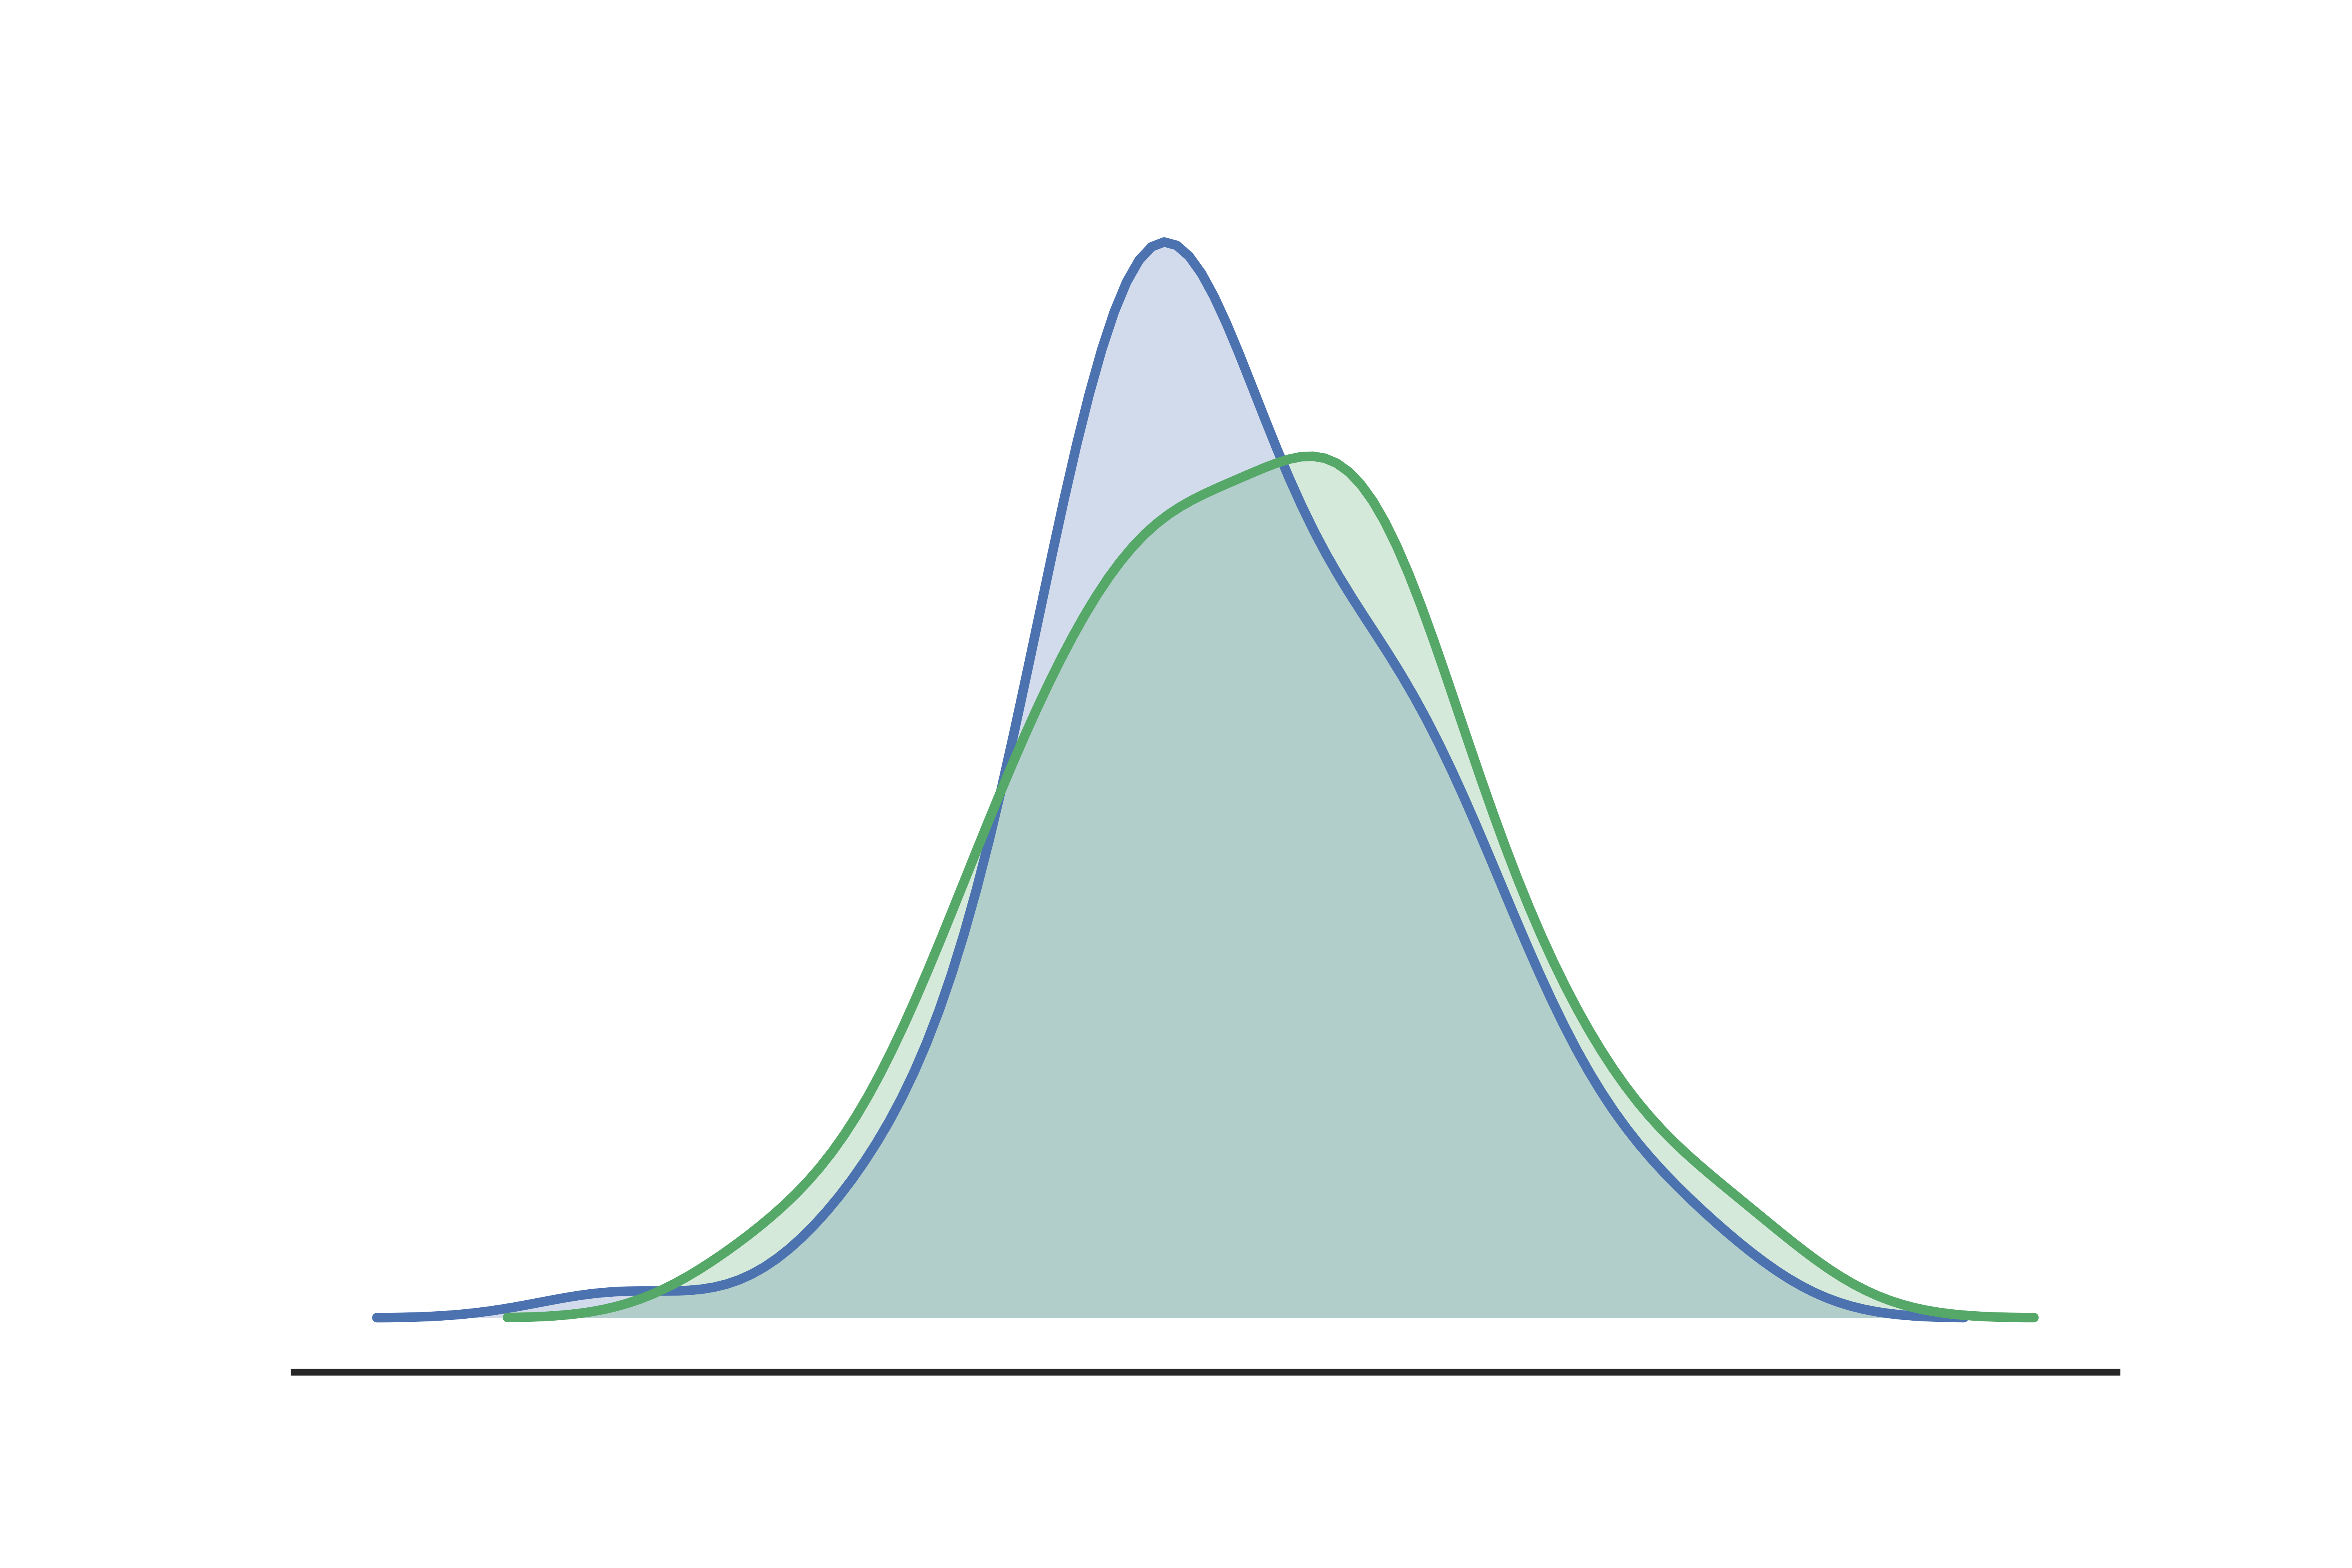

Como se puede ver, la población inicial ligeramente sesgada hacia la izquierda (azul) se ha aplanado un poco para tener una parte superior más plana de la curva de campana en la nueva población (verde). Desde una inspección visual, parece que la población está cambiando, pero me gustaría una forma cuantitativa de medir cuánto es el cambio en lugar de adivinar cualitativamente cuánto debería preocuparme. PSI es una excelente manera de crear una métrica única para medir esto.

Para calcular el PSI, primero dividimos el rango de población inicial en 10 buckets (un número arbitrario que puede cambiar), y contamos la cantidad de valores en cada uno de esos buckets para las poblacion inicial y nueva, y luego los dividimos por los valores totales en cada uno. población para obtener los porcentajes en cada bucket. Como era de esperar, trazar los porcentajes termina pareciéndose a una versión discreta del gráfico original:

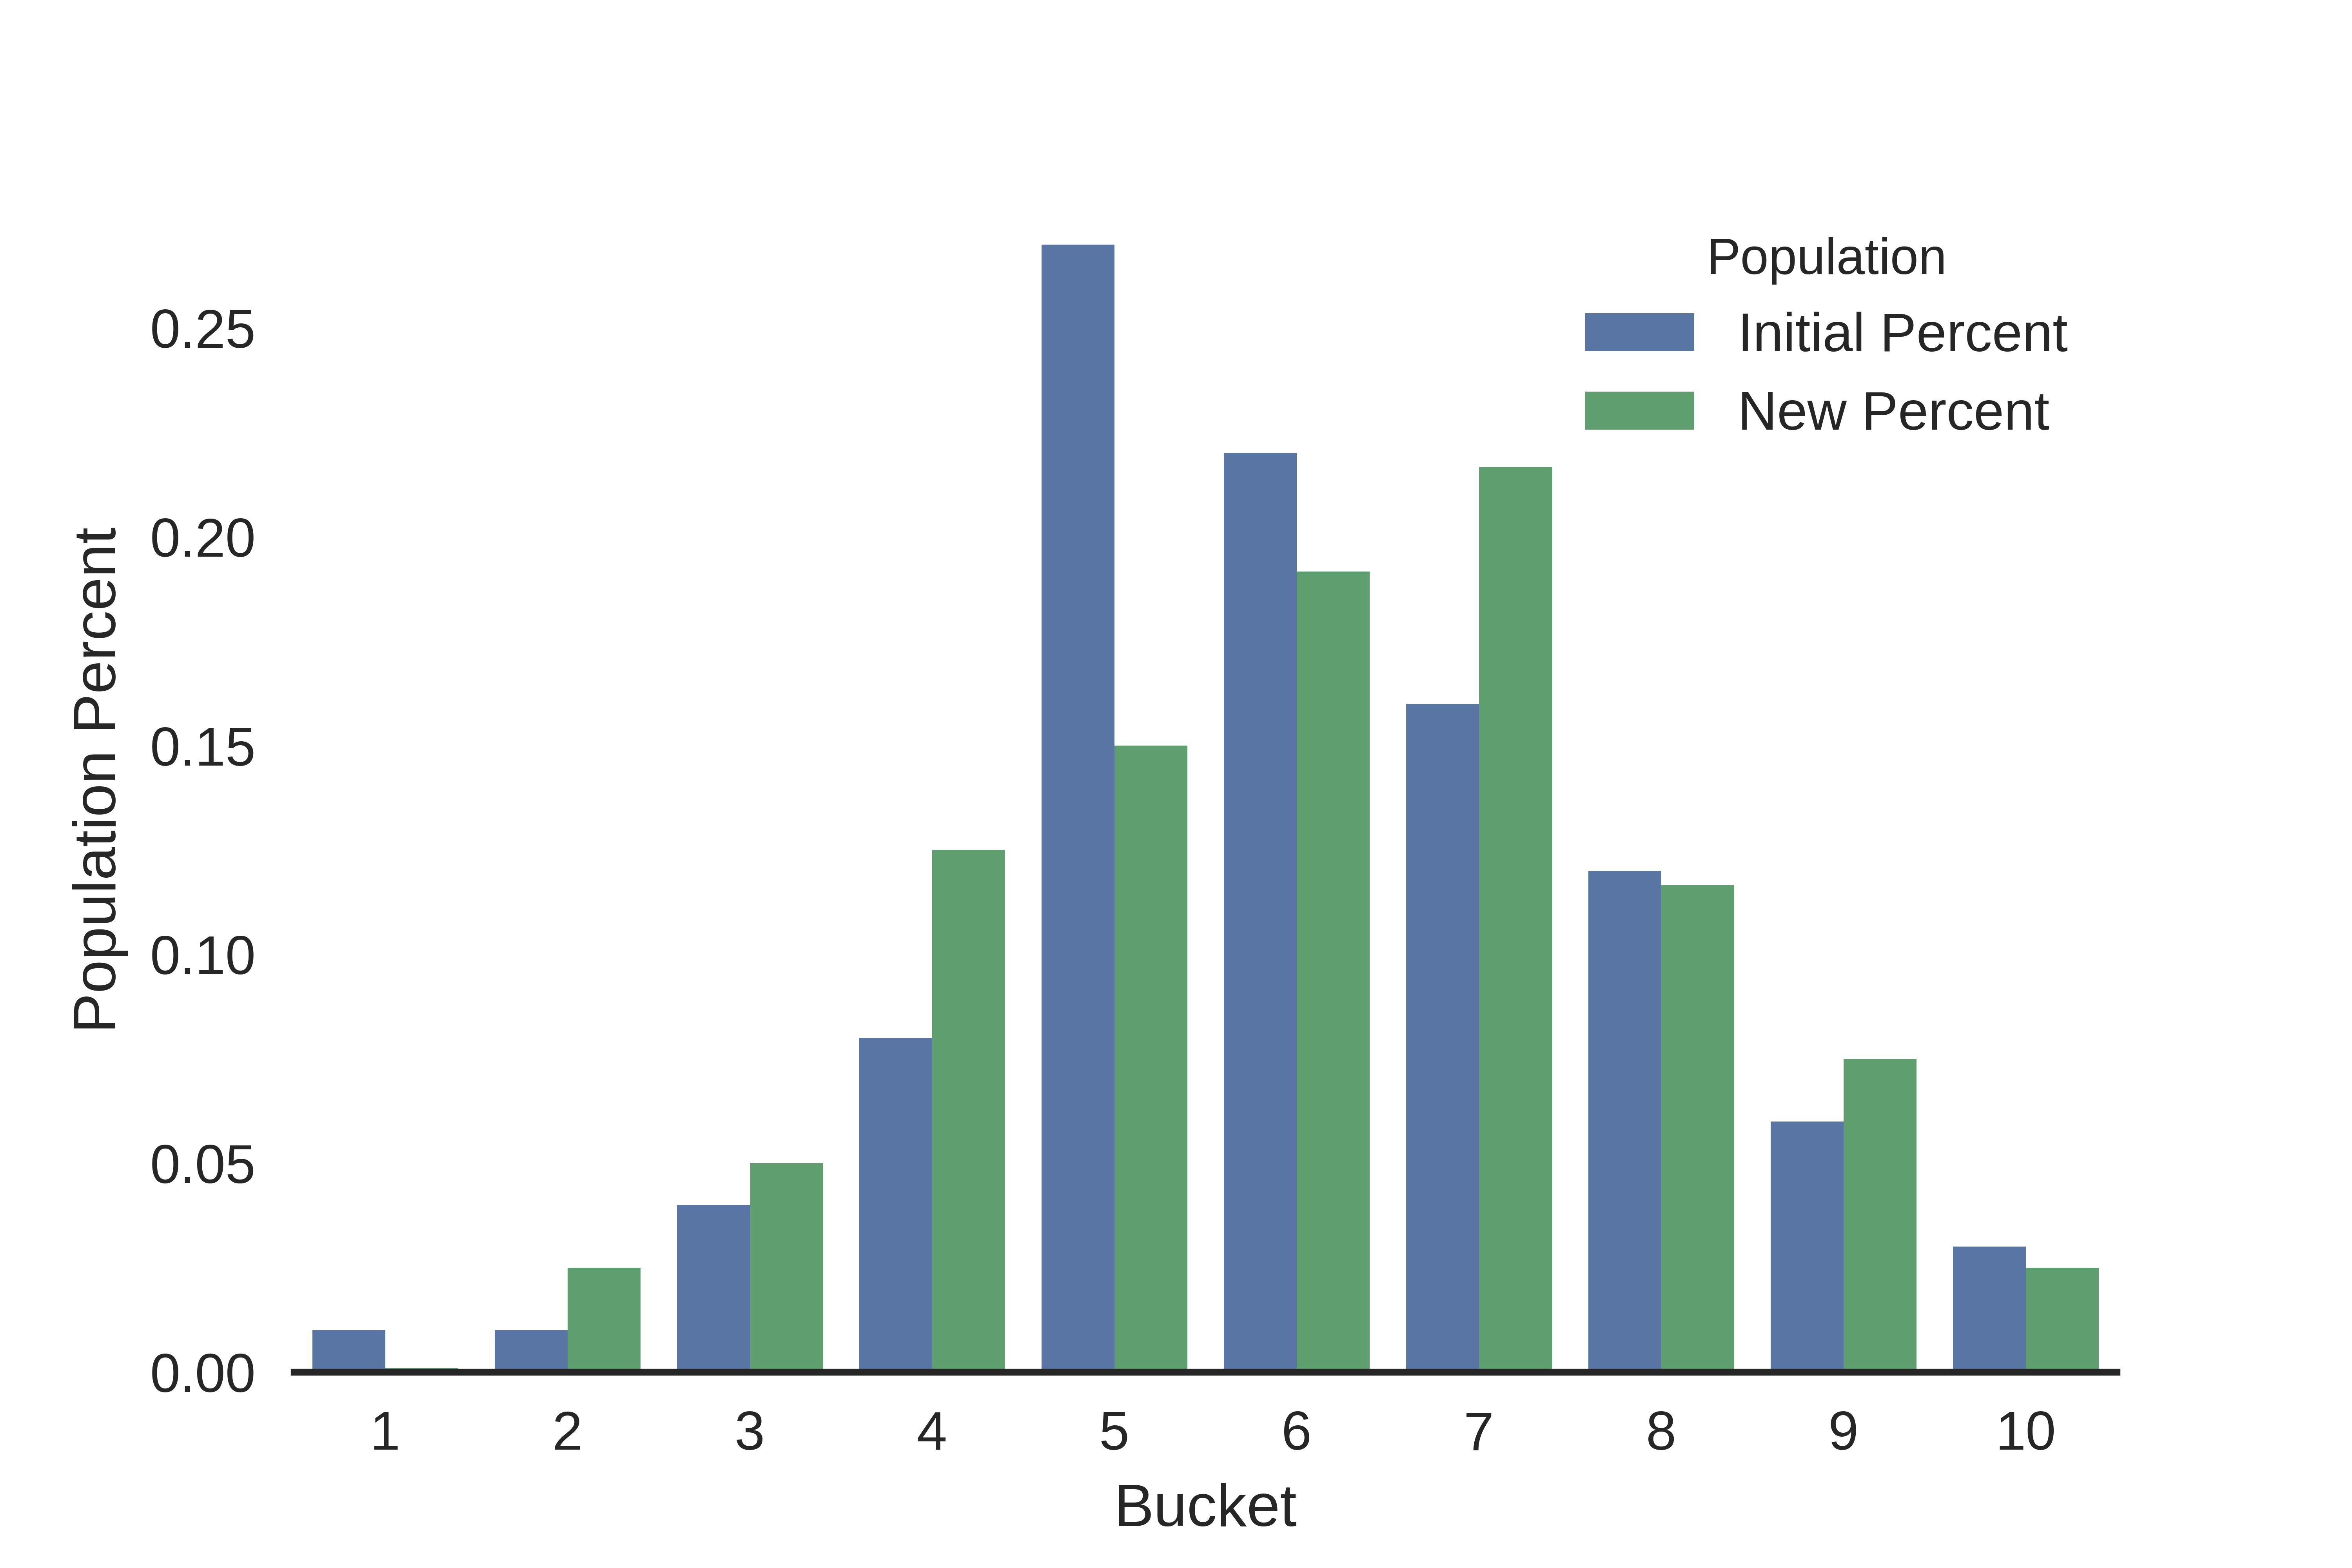

A partir de aquí, realizamos el cálculo de PSI real para cada bucket y los sumamos todos para obtener los valores de PSI generales para las distribuciones.

Ahora calculamos el PSI para cada contenedor usando la siguiente ecuación:

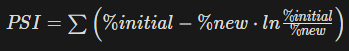

In [45]:
import numpy as np

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])

        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [52]:
data_monthly

,X1,X2,class,month
0,0.550284,0.918541,0.0,1
1,0.564631,0.409379,0.0,1
2,0.430762,0.624576,0.0,1
3,0.662184,0.154598,0.0,1
4,0.266372,0.541274,1.0,1
...,...,...,...,...
40995,0.842049,0.729838,1.0,12
40996,0.492425,0.974886,1.0,12
40997,0.370881,0.079075,1.0,12
40998,0.714709,0.093885,0.0,12


In [60]:
initial = data_monthly.copy()
actual  = data_monthly.sample(n=1000).copy()

In [61]:
calculate_psi(initial['X1'], actual['X1'])

C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_36436\3933921521.py:58: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


0.0077801187738469404

In [71]:
cut_point = 10
psidata = data_monthly.copy()
psidata['g'] = pd.cut(psidata['X1'],cut_point)
psitable = psidata.groupby('g')['X1'].count()
psitable /= psitable.sum()
standratio = 1/(cut_point-1)
psi = sum((psitable-standratio)*np.log(psitable/standratio))

#### Otro Ejemplo

In [75]:
import seaborn as sns
sns.set_style("white")
rs = np.random.RandomState(5)

initial = rs.normal(size = 100)
new = rs.normal(loc = 0.2, size = 120)

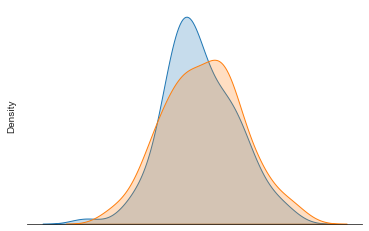

In [78]:
plot = sns.kdeplot(initial, shade=True)
plot = sns.kdeplot(new, shade=True)
plot.set(yticklabels=[], xticklabels = [])
sns.despine(left=True)

In [79]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

buckets = 10
raw_breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
breakpoints = scale_range(raw_breakpoints, np.min(initial), np.max(initial))

In [81]:
initial_counts = np.histogram(initial, breakpoints)[0]
new_counts     = np.histogram(new, breakpoints)[0]

In [82]:
df = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:], 'Initial Count':initial_counts, 'New Count':new_counts})
df['Initial Percent'] = df['Initial Count'] / len(initial)
df['New Percent'] = df['New Count'] / len(new)

In [85]:
df.loc[df['New Percent'] == 0, 'New Percent'] = 0.001

In [86]:
df

,Bucket,Breakpoint Value,Initial Count,New Count,Initial Percent,New Percent
0,1,-2.330642,1,0,0.01,0.001000
1,2,-1.801596,1,3,0.01,0.025000
2,3,-1.272550,4,6,0.04,0.050000
3,4,-0.743504,8,15,0.08,0.125000
4,5,-0.214458,27,18,0.27,0.150000
5,6,0.314588,22,23,0.22,0.191667
6,7,0.843633,16,26,0.16,0.216667
7,8,1.372679,12,14,0.12,0.116667
8,9,1.901725,6,9,0.06,0.075000
9,10,2.430771,3,3,0.03,0.025000


In [87]:
percents = df[['Initial Percent', 'New Percent', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})

In [88]:
percents.head()

,Bucket,Population,Percent
0,1,Initial Percent,0.01
1,2,Initial Percent,0.01
2,3,Initial Percent,0.04
3,4,Initial Percent,0.08
4,5,Initial Percent,0.27


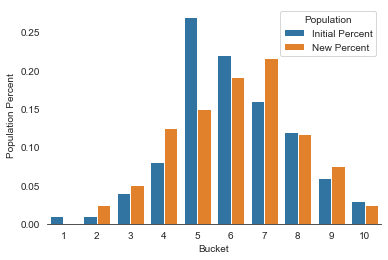

In [89]:
p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)

In [90]:
df['PSI'] = (df['New Percent'] - df['Initial Percent']) * np.log(df['New Percent'] / df['Initial Percent'])

In [91]:
df.head()

,Bucket,Breakpoint Value,Initial Count,New Count,Initial Percent,New Percent,PSI
0,1,-2.330642,1,0,0.01,0.001,0.020723
1,2,-1.801596,1,3,0.01,0.025,0.013744
2,3,-1.272550,4,6,0.04,0.050,0.002231
3,4,-0.743504,8,15,0.08,0.125,0.020083
4,5,-0.214458,27,18,0.27,0.150,0.070534


In [92]:
np.sum(df['PSI'])

0.15275591122393328